In [1]:
# LAB2 es.1

import csv
import matplotlib.pyplot as plt
%matplotlib inline

# READING THE FILE AS A LIST OF LISTS

list_of_tuples = []
with open("GLT_filtered.csv") as f:
    next(f) # skipping the header
    for cols in csv.reader(f):
        list_of_tuples.append(cols)    

In [2]:
# filling the gaps in the AvgTemperature column

for i in range(0, len(list_of_tuples)):
    if (list_of_tuples[i][1] == ''):
        city = list_of_tuples[i][3]
        last_avg_temp = 0
        next_avg_temp = 0
        
        j = i - 1
        while (j >= 0 and last_avg_temp == 0 and city == list_of_tuples[j][3]):
            if(list_of_tuples[j][1] != ''):
                last_avg_temp = float(list_of_tuples[j][1])
            j -= 1   
         
        j = i + 1
        while(i < len(list_of_tuples) and next_avg_temp == 0 and city == list_of_tuples[j][3]):
            if(list_of_tuples[j][1] != ''):
                next_avg_temp = float(list_of_tuples[j][1])
            j += 1
            
        new_avg_temp = (next_avg_temp + last_avg_temp)/2
        list_of_tuples[i][1] = str(new_avg_temp)

In [3]:
# getting the hottest and coldest temperatures for a city

def hotter_and_colder_temps(N, city):
    if(N <= 0):
        print("Invalid N.")
        return
    
    all_the_temps = list(map(lambda x: float(x[1]),filter(lambda x: x[3] == city ,list_of_tuples)))
    if(len(all_the_temps) < N*2):
        print(f"N is too large: largest N for city {city} is {len(all_the_temps)//2}")
        return
    
    all_the_temps.sort()
    
    print(f"{N} coldest temperatures in {city}: ")
    print(all_the_temps[:N])
    print(f"{N} hottest temperatures in {city}: ")
    print(all_the_temps[-N:])

hotter_and_colder_temps(3, 'Rome')

3 coldest temperatures in Rome: 
[-1.4410000000000005, -1.3039999999999994, -1.0189999999999997]
3 hottest temperatures in Rome: 
[24.873, 24.998, 25.951]


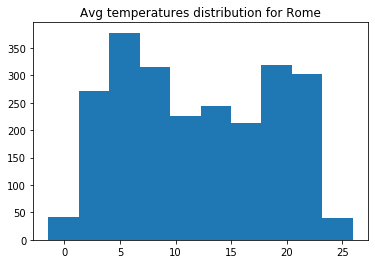

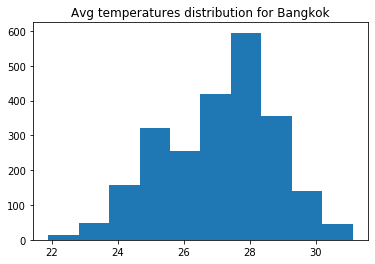

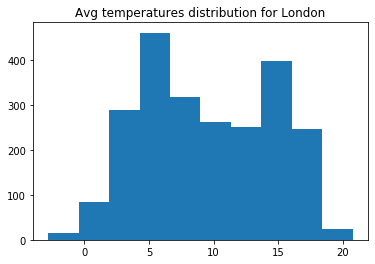

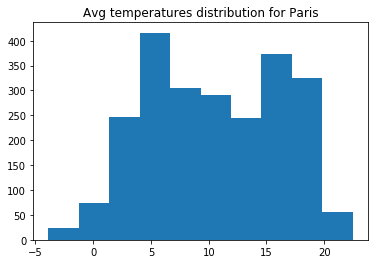

In [4]:
# comparing avg temperatures for 2 cities

cities = ['Rome', 'Bangkok', 'London', 'Paris']

# we notice that temperatures related to Bangkok are likely to be expressed in F --> conversion

for t in list_of_tuples:
    if(t[3] == 'Bangkok'):
        t[1] = str( (float(t[1]) - 32)*5/9 )
        
for city in cities:
    avg_temps = list(map(lambda x: float(x[1]),filter(lambda x: x[3] == city ,list_of_tuples)))
    plt.hist(avg_temps)
    plt.title(f"Avg temperatures distribution for {city}")
    plt.show()
    
